# An Example of rendering Sig0 from the Unsmoothed Data (SWOT_L2_LR_SSH_Unsmoothed)

**Author**: Jinbo Wang  
**Date Time**: 09/09/2023

---

## Introduction

This notebook provides an example of how to render the `sig0` value from the 250m-resolution Unsmoothed SWOT Level-2 Low-Resolution (LR) SSH product, with a short name `SWOT_L2_LR_SSH_Unsmoothed`. The `log(sig0)` is rendered to reveal more small-scale features. 

In this example, the SWOT's sig0 data unveils the presence of an iceberg in the Weddell Sea, located near the Antarctic Peninsula, which can be viewd through [NASA Worldview](https://go.nasa.gov/3RdXKq8).

This is simply an example script. There are a lot to do toward science quality product. Do not make any quatitative scientific conclusion based on the following analysis. 


## To do

1. Generate kml file for google earth
1. Add SSHA 

In [1]:
import pylab as plt
import numpy as np
import sys
sys.path.append('../src/')
import swot_ssh_utils as swot
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from glob import glob

## The following block generate a figure with lat-lon labels

In [2]:
def plot_unsmoothed_sea_ice_sig0(fn, cc, 
                                 s3sys=None,
                                 test_plot=False,
                                 for_google_earth=False):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import numpy as np
    # import swot  # Uncomment this line if you're using swot for SSH_L2

    dd = swot.SSH_L2()
    dd.load_data(fn, s3sys=s3sys, lat_bounds=[])
    pn=fn.split('/')[-1].split('_')[6]
    cn=fn.split('/')[-1].split('_')[5]
    fnn = fn.split('/')[-1]

    lat = dd.left.latitude.data[:, 120]
    lon = dd.left.longitude.data[:, 120]
    if len(cc['lat_bounds']) == 2:
        lat0, lat1 = cc['lat_bounds']
        msk = (lat > lat0) & (lat < lat1)
    else:
        lon0, lon1 = cc['lon_bounds']
        msk = (lon > lon0) & (lon < lon1)
    # Create a figure and axis with Orthographic projection
    fig, ax = plt.subplots(1,1, figsize=(6,5),
                    subplot_kw={'projection': 
                            ccrs.LambertAzimuthalEqualArea(central_latitude=np.nanmean(dd.left.latitude.data),
                            central_longitude=np.nanmean(dd.left.longitude.data))})
    
    # Loop through the left and right data
    lons, lats = [], []
    if test_plot:
        skip=16
    else:
        skip=1
    for i, tmp in enumerate([dd.left, dd.right]):
        
        lon, lat = tmp.longitude.data[msk, :], tmp.latitude.data[msk, :]
        lons.append(lon)
        lats.append(lat)
        dtm = tmp.sig0_karin_2[msk, :].data
        dtm -= np.nanmin(dtm+1e-10)
        mm=np.isfinite(dtm)
        dtm[mm] = np.log2(dtm[mm])
        cax2 = ax.pcolor(lon[::skip,::skip], lat[::skip,::skip], 
                        dtm[::skip,::skip],
                        vmin=4,vmax=8,
                        cmap='bone',
                        transform=ccrs.PlateCarree())    
    
    min_lon=np.nanmin(np.array(lons))
    max_lon=np.nanmax(np.array(lons))
    min_lat=np.nanmin(np.array(lats))
    max_lat=np.nanmax(np.array(lats))
    ax.set_extent([min_lon, max_lon, min_lat, max_lat ] ,crs=ccrs.PlateCarree())
    if for_google_earth: #not working yet
        # Remove the border frame
        ax.set_frame_on(False)
        # Turn off the axis
        ax.axis('off')
        ax.set_facecolor("none")
        # Ensure that the aspect ratio is equal
        ax.set_aspect('equal', 'box')
        plt.savefig('../media/figures/Unsmoothed_sig0_images/'+fn.split('/')[-1].split('.')[0]+'_noborder.png', 
                    dpi=300,bbox_inches='tight', pad_inches=0)
    else:
        gl0 = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.COASTLINE)
        ax.text(0.02, 0.02, fnn,
                horizontalalignment='left',
                fontsize=6,
                transform=ax.transAxes,
                color='white',)
        cbar = plt.colorbar(cax2, ax=ax,
                        shrink=0.9, orientation='horizontal',
                        pad=0.1, aspect=50,
                        label='log2(sig0)')
        plt.axis('equal')
        #plt.tight_layout()
        plt.savefig('../media/figures/Unsmoothed_sig0_images/'+fn.split('/')[-1].split('.')[0]+'.png', 
                    dpi=300,bbox_inches='tight', pad_inches=0)

    


## Script Parameters and Definitions

- **cc**: Defines the region to plot, along with parameters pointing to a specific region and time.
- **lat_bounds**: Used to identify target regions. If `lat_bounds` is empty, `lon_bounds` is used instead.
- **pn**: Stands for "pass_number" and refers to the pass number for the SWOT satellite.
- **day**: Represents the day of the year, used to identify the file name.
- **region_name**: Used for the title of the plot. (not yet)

### File Naming Convention

For example, in the file `SWOT_L2_LR_SSH_Unsmoothed_578_005_20230710T091205_20230710T100311_PIA1_01.nc`:
- **pn**: 005
- **cycle number**: 578
- **day**: 0710

> **Note**: The cycle number is not used for file identification in this example because the combination of `pn` and `day` is unique enough.

### Additional Notes

- **Interesting Regions**: The following block includes a list of regions that are of interesting for plotting (at least to me).
- **sig0**: Particularly useful for examining sea ice.


['/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/SWOT_L2_LR_SSH_Unsmoothed_486_005_20230409T233402_20230410T002508_PIA1_01.nc', '/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/SWOT_L2_LR_SSH_Unsmoothed_487_005_20230410T232440_20230411T001546_PIA1_01.nc']
Load unsmoothed data to self.left and self.right


/tmp/ipykernel_40706/617248424.py:45: RuntimeWarning: divide by zero encountered in log2
  dtm[mm] = np.log2(dtm[mm])


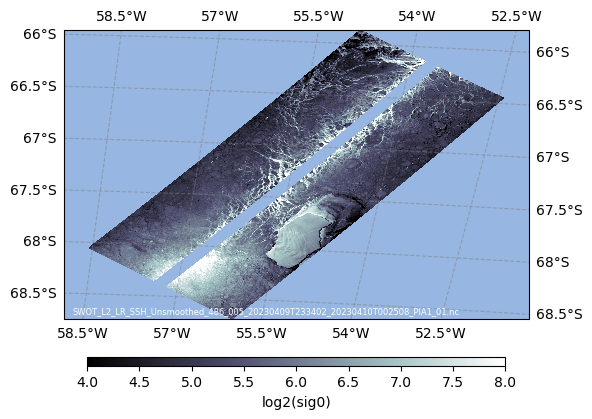

In [3]:
# Be aware that this block takes >15min to run

cc={'pn':'021','lat_bounds':[-65,-64.5],'lon_bounds':[],'day':'0313','region_name':'Antarctica'}
cc={'pn':'013','lat_bounds':[-76.8,-76.3],'lon_bounds':[],'day':'0323','region_name':'Antarctica'}
cc={'pn':'001','lat_bounds':[],'lon_bounds':[],'day':'0120','region_name':'Antarctica'}
cc={'pn':'025','lat_bounds':[-67.3,-65.8],'lon_bounds':[],'day':'0120','region_name':'Antarctica'}
cc={'pn':'006','lat_bounds':[-68,-66],'lon_bounds':[],'day':'0120','region_name':'Antarctica'}
cc={'pn':'008','lat_bounds':[],'lon_bounds':[163,168],'day':'0120','region_name':'Wedell Sea'}
cc={'pn':'010','lat_bounds':[-66,-64.3],'lon_bounds':[],'day':'0410','region_name':'Antarctica'}

cc={'pn':'005','lat_bounds':[-68.2,-66],'lon_bounds':[],'day':'0410','region_name':'Wedell Sea'}

pn=cc['pn'];day=cc['day'] 

import socket
if 'eddy' == socket.gethostname():
    platform = 'local' 
    fns = sorted(glob(f'/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/*Unsmoothed*_{pn}_*2023{day}*.nc'))
else:
    platform = 'AWS'
    s3sys=swot.init_S3FileSystem()
#fns=s3sys.glob(f"s3://podaac-swot-ops-cumulus-protected/{ss}/*Unsmoothed*_009_*.nc")
print(fns)

plot_unsmoothed_sea_ice_sig0(fns[0],cc,
                             for_google_earth=False, # not working yet
                             test_plot=False, # plot every 16th point to speed up plotting, not for final plots
                             s3sys=None)

## Image without coordinates for kml

The code below utilizes `pylab.imshow` to display the logarithm base 2 of `sig0`, mapping data points to pixels while maintaining the same aspect ratio. The genereated images can be integrated into Google Earth using an appropriate KML file (pending implementation).

['/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/SWOT_L2_LR_SSH_Unsmoothed_486_005_20230409T233402_20230410T002508_PIA1_01.nc', '/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/SWOT_L2_LR_SSH_Unsmoothed_487_005_20230410T232440_20230411T001546_PIA1_01.nc']
Load unsmoothed data to self.left and self.right


/tmp/ipykernel_40706/502843793.py:34: RuntimeWarning: divide by zero encountered in log2
  dtm[mm] = np.log2(dtm[mm])


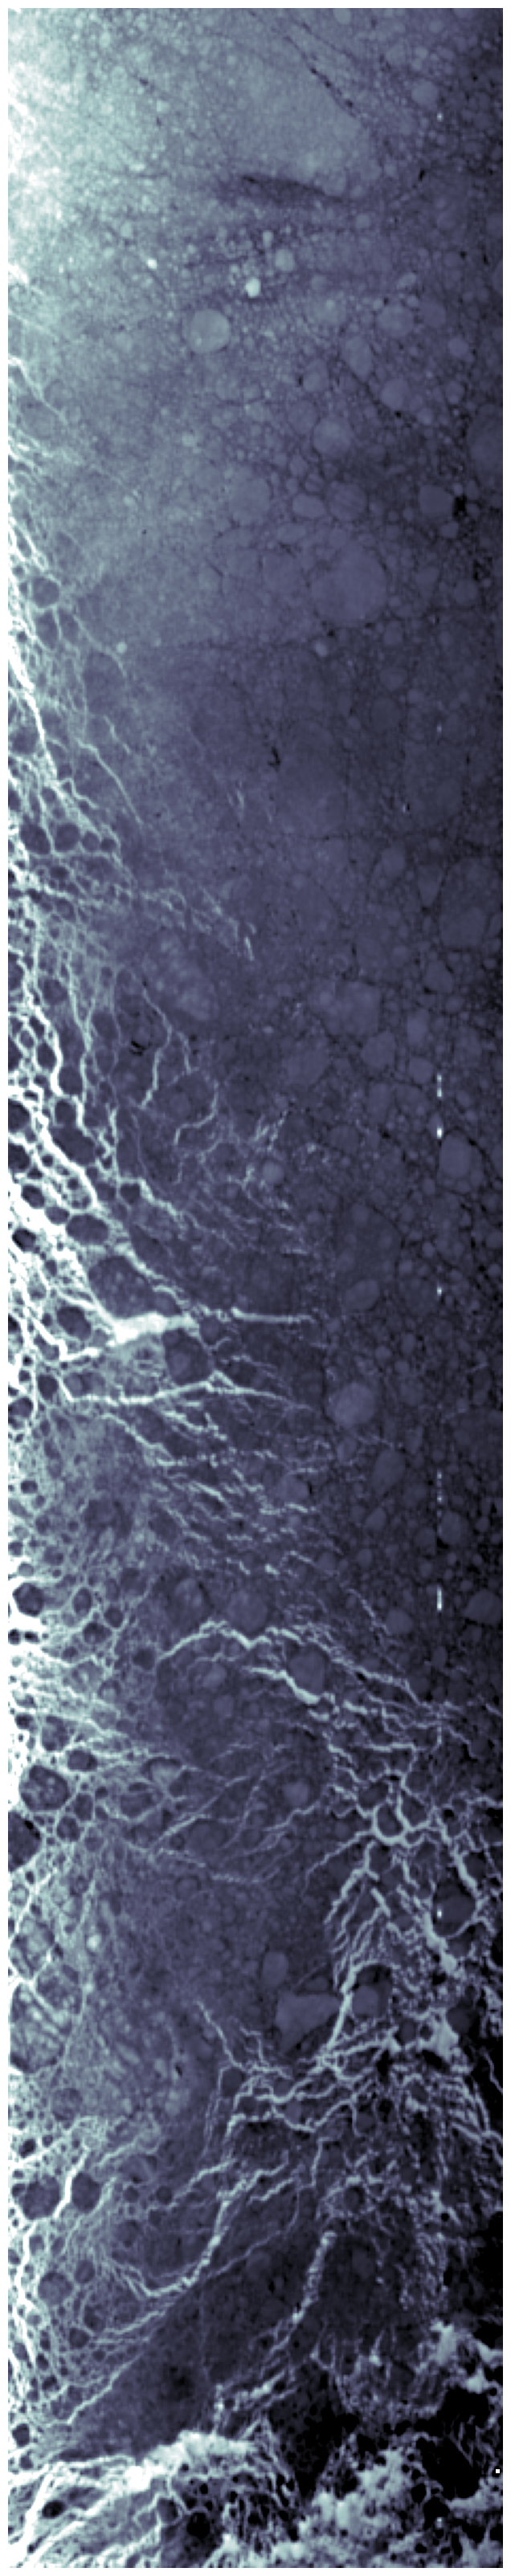

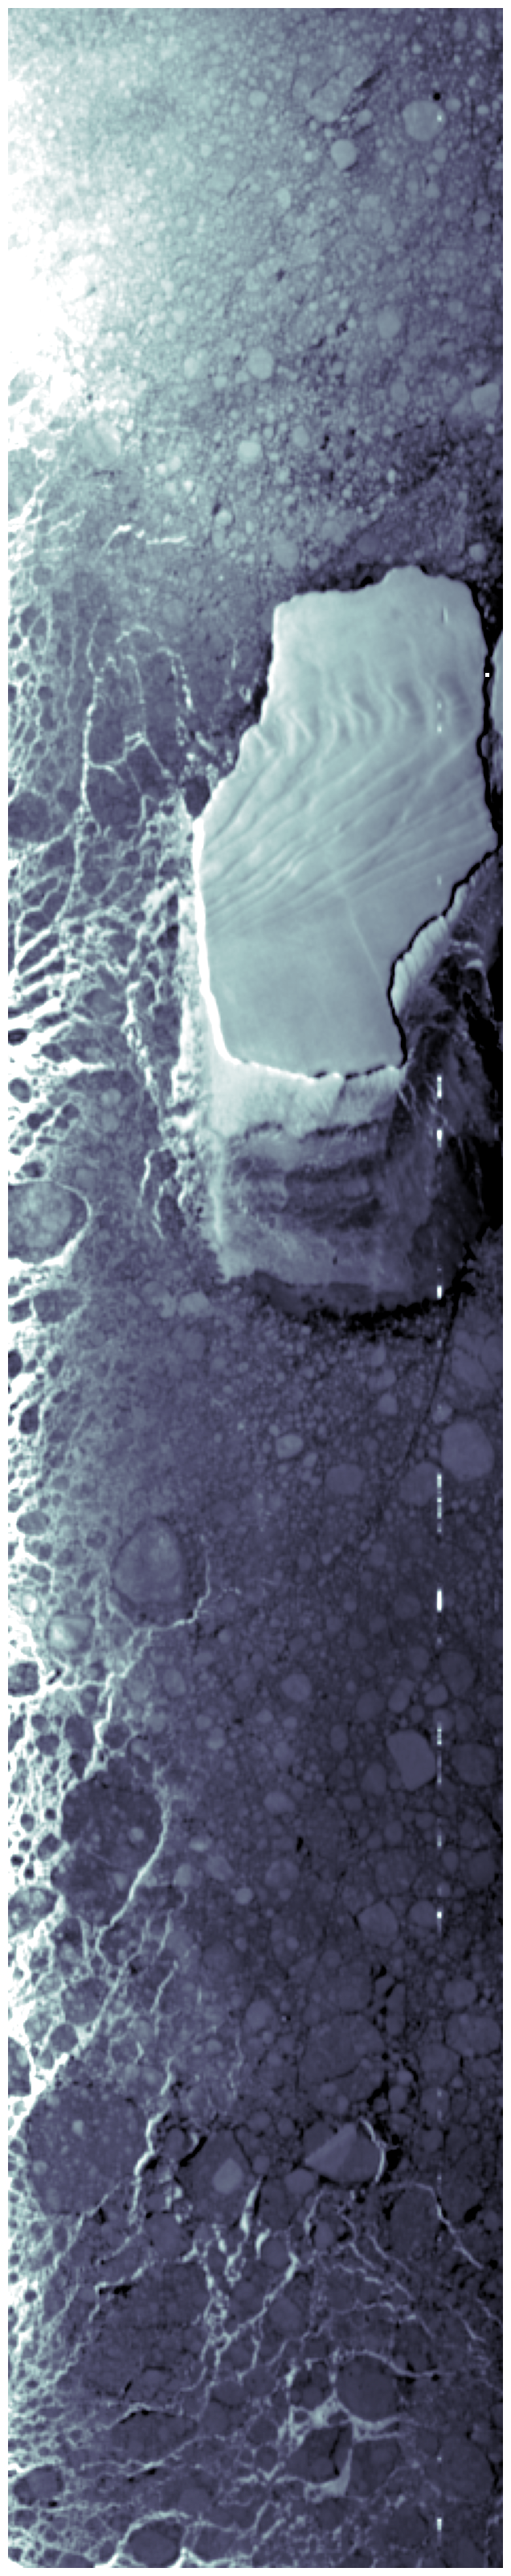

In [4]:
def plot_unsmoothed_sea_ice_sig0_simple(fn, cc, 
                                 s3sys=None,
                                 test_plot=False,
                                 for_google_earth=False):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import numpy as np

    #Look into swot_ssh_utils.py for more details about the SSH_L2 class
    dd = swot.SSH_L2()
    dd.load_data(fn, s3sys=s3sys, lat_bounds=[])

    #Get the pass number and cycle number from the filename
    pn=fn.split('/')[-1].split('_')[6]
    cn=fn.split('/')[-1].split('_')[5]

    #Get the filename without the path, used for the figure filename
    fnn = fn.split('/')[-1]

    # Create mask based on latitude or longitude boundaries for subset
    # lat_bounds is used first if it exists, then lon_bounds
    # This will subset a segment without changing the data structure (num_lines, num_pixels)
    # Use the lon,lat data from the center of the left swath. This is an approximation. 
    lat = dd.left.latitude.data[:, 120]
    lon = dd.left.longitude.data[:, 120]
    
    #First use lat_bounds if it exists and has two values. 
    if len(cc['lat_bounds']) == 2:
        lat0, lat1 = cc['lat_bounds']
        msk = (lat > lat0) & (lat < lat1)
    else: #Otherwise use lon_bounds
        lon0, lon1 = cc['lon_bounds']
        msk = (lon > lon0) & (lon < lon1)
    # Loop through left and right sides
    for nn, tmp in zip(['left','right'],[dd.left, dd.right]):
        # Extract longitude and latitude data based on the mask
        lon, lat = tmp.longitude.data[msk, 3:-4], tmp.latitude.data[msk, 3:-4]
        
        # Prepare data for visualization (sig0)
        dtm = tmp.sig0_karin_2[msk, 3:-4].data
        dtm -= np.nanmin(dtm)+1e-10 # Subtract min, add a small number to avoid log(0)
        mm=np.isfinite(dtm) # Create a mask for finite values
        dtm[mm] = np.log2(dtm[mm]) # Take the log2 of the valid data
        
        #I try to use the following code to find the corner coordinates for the kml file.
        #It doesn't work yet. 
        #Please let me know if you have any suggestions. 
        lonmin,lonmax=lon[0,0],lon[-1,-1]
        if lonmin>lonmax:
            dtm=dtm[:,::-1]
        latmin,latmax=lat[0,0],lat[-1,-1]
        if latmin>latmax:
            dtm=dtm[::-1,:]
        bbox = [np.nanmin(lon), np.nanmax(lon), np.nanmin(lat), np.nanmax(lat)]

        if lonmin>lonmax:
            dtm=dtm
        ny,nx=dtm.shape
        fig,ax=plt.subplots(1,1,figsize =(8,ny/nx*8))

        ax.imshow(dtm,vmin=4,vmax=8,cmap='bone')    
    
        ax.set_frame_on(False)
        # Turn off the axis
        ax.axis('off')
        ax.set_facecolor("none")
        # Ensure that the aspect ratio is equal
        ax.set_aspect('equal', 'box')

        figfn = f'../media/figures/Unsmoothed_sig0_images/'+\
              fn.split('/')[-1].split('.')[0]+f'_Lon{bbox[0]:.2f}_{bbox[1]:.2f}_Lat{bbox[2]:.2f}_{bbox[3]:.2f}.png'
        plt.savefig(figfn, 
                    dpi=300,bbox_inches='tight', pad_inches=0)
        
        #Need to fix the following function to make it work
        #gen_kml(figfn,bbox=bbox)
    return 
def gen_kml(figure_fn, bbox):
    """
    Generate a KML file for Google Earth

    Parameters
    ----------
    figure_fn : str
        Filename of the figure
    bbox : list
        Bounding box of the figure in the format [lon0, lon1, lat0, lat1]
    """
    import simplekml
    import os

    # Create a KML file
    kml = simplekml.Kml()
    # Create a ground overlay
    ground = kml.newgroundoverlay(name=os.path.basename(figure_fn))
    # Specify the image to use as the overlay and the bounding box
    ground.icon.href = f"https://github.com/podaac/SWOT-OpenToolkit/blob/main/media/figures/{figure_fn}"
    ground.gxlatlonquad.coords = [(bbox[0], bbox[2]), (bbox[1], bbox[2]),
                                  (bbox[1], bbox[3]), (bbox[0], bbox[3])]
    # Save the KML file
    kml.save(os.path.splitext(figure_fn)[0] + '.kml')
    return


#This region was first shown by CNES 
cc={'pn':'005','lat_bounds':[-68.2,-66],'lon_bounds':[],'day':'0410','region_name':'Wedell Sea'}

pn=cc['pn'];day=cc['day'] 

if 'eddy' == socket.gethostname():
    platform = 'local' 
    fns = sorted(glob(f'/mnt/flow/swot/KaRIn/SWOT_L2_LR_SSH_1.0/*Unsmoothed*_{pn}_*2023{day}*.nc'))
else:
    platform = 'AWS'
    s3sys=swot.init_S3FileSystem()
#fns=s3sys.glob(f"s3://podaac-swot-ops-cumulus-protected/{ss}/*Unsmoothed*_009_*.nc")
print(fns)

plot_unsmoothed_sea_ice_sig0_simple(fns[0],cc,
                             for_google_earth=False, # not working yet
                             test_plot=False, # plot every 16th point to speed up plotting, not for final plots
                             s3sys=None)